In [3]:
#lesson 3: neural networks and mnist basics

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image',cmap='Greys')

In [6]:
#tutorial to try to create a model that can classify any image as a 3 or 7. 

In [7]:
#downloading a sample of MNIST that contains images of just 3 and 7
path=untar_data(URLs.MNIST_SAMPLE) 

In [8]:
Path.BASE_PATH=path

In [9]:
path.ls() #we can see whats in this directory by using ls method added by fastai.

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [10]:
#The MNIST DATASET follows a common layout for ML datasets: Separate folders for the
#training set and validation set.This will get us whats inside train set
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [11]:
'''Theres a folder of 3s and 7s. In ml parlance, we say that 3 and 7 are the labels or targets in 
this dataset. The following piece of code lets us peak into them'''
threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [12]:
#As we might expect, its full of images.Sampling out one handwritten 3
im3_path=threes[1]
im3=Image.open(im3_path)
im3

In [13]:
#now we use PIL , jupyter has it already so we dont import separately. 
#PIL is the PYTHON IMAGING LIBRARY, MOST WIDELY USED PYTHON PACKAGE FOR OPENING,MANIPULATING AND VIEWING IMAGES.
#tO VIEW THE NUMBERS THAT MAKE UP THIS IMAGE, WE HAVE TO CONVERT IT INTO A NUMPY ARRAY OR A PYTORCH TENSOR
#THUS
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [15]:
#slicing the tensor to pick just the part with the top of the digit in it, then using pandas dataframe, we color code the values using a gradient,which shows the sfollowing output
im3_t=tensor(im3)
df=pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [16]:
#clearly bg white pixels have 0 as vlaue
#black has 255 ish
#thus we have seen how a image is processed by PIL

In [17]:
'''Initial idea
we find the average pixel value for every pixel of the 3s, then do the same for the 7s.
This will give us two group averages, defining "ideal" 3s and 7s. 
Then to classify an image as one digit or the other, we see which of these two ideal digits match 
the image.(more similar)
just a baseline tho
'''

'Initial idea\nwe find the average pixel value for every pixel of the 3s, then do the same for the 7s.\nThis will give us two group averages, defining "ideal" 3s and 7s. \nThen to classify an image as one digit or the other, we see which of these two ideal digits match \nthe image.(more similar)\njust a baseline tho\n'

In [18]:
#creating a tensor containing all of our 3s stacked together. We already know how to
#create a tensor containing single image. To create a tensor containing all the images, 
#we use python list comprehension to create a plain list of the single image tensors
seven_tensors=[tensor(Image.open(o)) for o in sevens]
three_tensors=[tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [19]:
'''UNDERSTANDING LIST COMPREHENSIONS
-A FEATURE IN PYTHON
-'IDIOMATIC PYTHON'
-new_list=[f(o) for o in a_list if o>0]
-returns every element of a_list that is greater than 0, f(o) is like a representation of the function over o that represents all values after the parsing has been done
-shorter way to create huge lists-than with a loop
'''

"UNDERSTANDING LIST COMPREHENSIONS\n-A FEATURE IN PYTHON\n-'IDIOMATIC PYTHON'\n-new_list=[f(o) for o in a_list if o>0]\n-returns every element of a_list that is greater than 0, f(o) is like a representation of the function over o that represents all values after the parsing has been done\n-shorter way to create huge lists-than with a loop\n"

<Axes: >

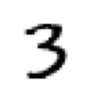

In [20]:
show_image(three_tensors[1])  #using fastai's show_image to show image

In [21]:
'''
For every pixel position, we want to compute the average over all the images of intensity of that pixel
to do this we first combine all the images in this list into a single 3-d tensor.The most common way to desrcribe such a tensor is to call it a rank 3 tensor
We need to stack up individuall tensors into a 3D tensor so we used PyTorch function called stack.
Some operations in PyTorch require us to cast int to float. 
'''

'\nFor every pixel position, we want to compute the average over all the images of intensity of that pixel\nto do this we first combine all the images in this list into a single 3-d tensor.The most common way to desrcribe such a tensor is to call it a rank 3 tensor\nWe need to stack up individuall tensors into a 3D tensor so we used PyTorch function called stack.\nSome operations in PyTorch require us to cast int to float. \n'

In [22]:
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_threes=torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [23]:
len(stacked_threes.shape) #displays its rank indirectly, using shape which is size of each axis of a tensor

3

In [24]:
stacked_threes.ndim  #directly getting the rank

3

<Axes: >

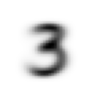

In [25]:
mean3=stacked_threes.mean(0)  #a sort of mean "ideal 3"
show_image(mean3)

<Axes: >

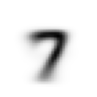

In [26]:
mean7= stacked_sevens.mean(0) #a sort of mean ideal 7
show_image(mean7)

In [27]:
'''Now we pick an arbitrary 3 and measure its distance from our ideal 3/7'''

'Now we pick an arbitrary 3 and measure its distance from our ideal 3/7'

<Axes: >

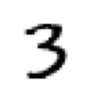

In [28]:
a_3=stacked_threes[1]
show_image(a_3)

In [29]:
'''
This is how we determine the distance from our ideal 3
We cant just add up the differences because some will be + and others will be negative
so we can either take mean absolute values of the differences
or take mean square of the differences and then take square root (RMS value)
'''

'\nThis is how we determine the distance from our ideal 3\nWe cant just add up the differences because some will be + and others will be negative\nso we can either take mean absolute values of the differences\nor take mean square of the differences and then take square root (RMS value)\n'

In [30]:
dist_3_abs=(a_3-mean3).abs().mean()
dist_3_sqr=((a_3-mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [31]:
dist_7_abs=(a_3-mean7).abs().mean()
dist_7_sqr=((a_3-mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [33]:
F.l1_loss(a_3.float(),mean7),F.mse_loss(a_3,mean7).sqrt() 
#mse stands for mean squared errors and l1 refers to the standard mathematical jargon for mean absolute value

(tensor(0.1586), tensor(0.3021))

In [34]:
'''
The difference between L1 norm and mean square error is that latter will penalize bigger mistakes more heavily 
than the former(and be more lenient with mistakes)
L1 loss is just (a-b).abs().mean() where a and b are tensors
'''

'\nThe difference between L1 norm and mean square error is that latter will penalize bigger mistakes more heavily \nthan the former(and be more lenient with mistakes)\nL1 loss is just (a-b).abs().mean() where a and b are tensors\n'

In [36]:
valid_3_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens=valid_3_tens.float()/255
valid_7_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens=valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [37]:
def mnist_distance(a,b):return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [38]:
valid_3_dist=mnist_distance(valid_3_tens,mean3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [39]:
tensor([1,2,3])+tensor(1)

tensor([2, 3, 4])

In [40]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [41]:
def is_3(x):return mnist_distance(x,mean3)<mnist_distance(x,mean7)

In [42]:
is_3(a_3),is_3(a_3).float()

(tensor(True), tensor(1.))

In [43]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [48]:
accuracy_3s=is_3(valid_3_tens).float().mean()
accuracy_7s=1-(is_3(valid_7_tens).float().mean())
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [50]:
'''
w -= gradient(w) * lr
'''

'\nw -= gradient(w) * lr\n'

In [51]:
'''
AN END TO END SGD EXAMPLE
'''

'\nAN END TO END SGD EXAMPLE\n'

In [52]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

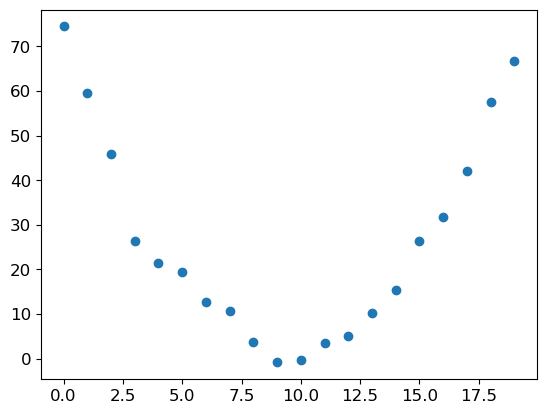

In [53]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [54]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [55]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [56]:
#Step 1: Initialize the parameters
params = torch.randn(3).requires_grad_()

In [57]:
orig_params = params.clone()
     

In [58]:
#Step 2: Calculate the predictions
preds = f(time, params)

In [59]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

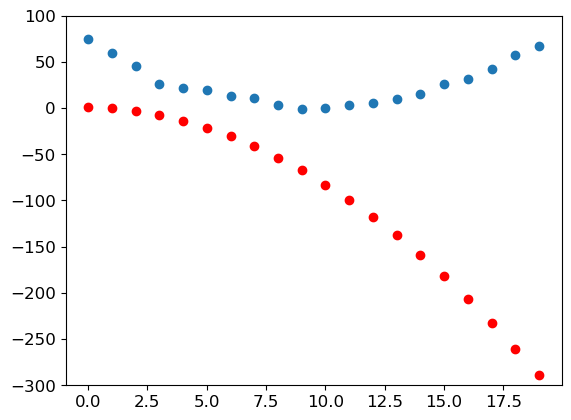

In [61]:
show_preds(preds)

In [62]:
#Step 3: Calculate the loss
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [63]:
#Step 4: Calculate the gradients
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [64]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [65]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [66]:
#Step 5: Step the weights.
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None
     

In [67]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

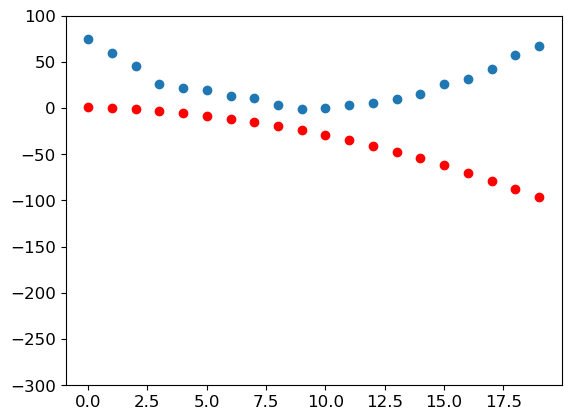

In [68]:
show_preds(preds)

In [69]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [71]:
#Step 6: Repeat the process
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [72]:
params = orig_params.detach().requires_grad_()

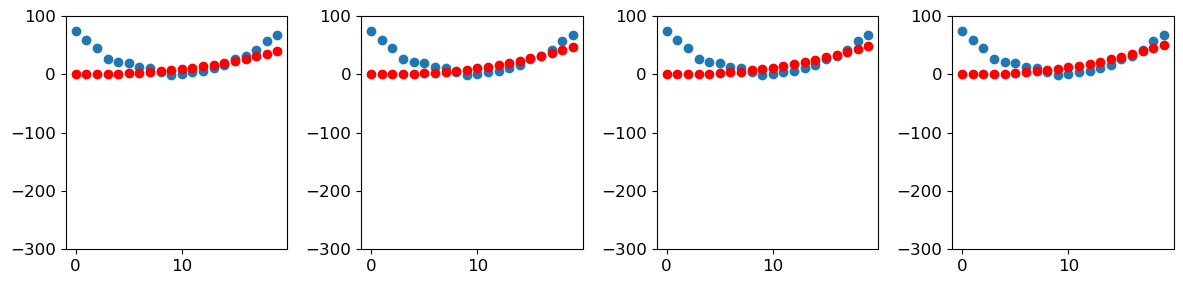

In [74]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [76]:
train_x=torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)

In [77]:
train_y=tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [78]:
dset=list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [80]:
valid_x=torch.cat([valid_3_tens,valid_7_tens]).view(-1,28*28)
valid_y=tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)
valid_dset=list(zip(valid_x,valid_y))

In [83]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()


In [87]:
weights=init_params(28*28,1)

In [88]:
bias=init_params(1)

In [89]:
(train_x[0]*weights.T).sum()+bias

tensor([9.7615], grad_fn=<AddBackward0>)

In [91]:
def linear1(xb): return xb@weights+bias
preds=linear1(train_x)
preds

tensor([ 9.7615, 14.7372,  9.3375,  ...,  7.6622,  4.2516,  1.1847], grad_fn=<AddBackward0>)

In [92]:
corrects=(preds>0.0).float()==train_y
corrects

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [93]:
corrects.float().mean().item()

0.49650830030441284

In [94]:
with torch.no_grad(): weights[0] *=1.001

In [95]:
pred=linear1(train_x)
((preds>0.0).float()==train_y).float().mean().item()

0.49650830030441284

In [96]:
trgts=tensor([1,0,1])
prds=tensor([0.9,0.4,0.2])

In [100]:
def mnist_loss(predictions,targets):
    return torch.where(targets==1,1-predictions,predictions).mean()

In [98]:
torch.where(trgts==1,1-prds,prds)

tensor([0.1000, 0.4000, 0.8000])

In [101]:
mnist_loss(prds,trgts)

tensor(0.4333)


mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

In [102]:

mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

In [103]:
def sigmoid(x): return 1/(1+torch.exp(-x))

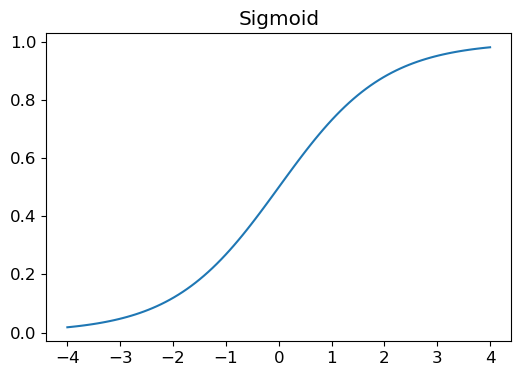

In [104]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [105]:

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [106]:

coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [107]:

ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [108]:

dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)
     

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [109]:

weights = init_params((28*28,1))
bias = init_params(1)
     

In [110]:

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape
     

(torch.Size([256, 784]), torch.Size([256, 1]))

In [111]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [112]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [113]:
preds = linear1(batch)
preds

tensor([[-16.3989],
        [ -7.9580],
        [-11.7045],
        [-21.6327]], grad_fn=<AddBackward0>)

In [114]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9999, grad_fn=<MeanBackward0>)

In [115]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-1.2743e-05), tensor([-8.9484e-05]))

In [116]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [117]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-2.5486e-05), tensor([-0.0002]))

In [118]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-3.8229e-05), tensor([-0.0003]))

In [119]:
weights.grad.zero_()
bias.grad.zero_();

In [120]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [121]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [122]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()
     

In [123]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [124]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [125]:
validate_epoch(linear1)

0.5727

In [126]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8491

In [127]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9199 0.9399 0.9502 0.957 0.9599 0.9614 0.9634 0.9643 0.9668 0.9678 0.9702 0.9707 0.9726 0.9731 0.9736 0.9746 0.9756 0.9756 0.9751 0.9761 

In [128]:
linear_model = nn.Linear(28*28,1)
     

In [129]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [130]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [131]:
opt = BasicOptim(linear_model.parameters(), lr)

In [132]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [133]:
validate_epoch(linear_model)

0.7138

In [134]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [135]:
train_model(linear_model, 20)
     

0.4932 0.7866 0.8555 0.918 0.9355 0.9482 0.9555 0.9638 0.9658 0.9682 0.9702 0.9721 0.9741 0.9741 0.9761 0.9765 0.9775 0.9775 0.978 0.9785 

In [136]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)
     

0.4932 0.8462 0.8408 0.9126 0.9346 0.9478 0.956 0.9624 0.9658 0.9668 0.9692 0.9717 0.9736 0.9751 0.9761 0.9765 0.9775 0.9785 0.9785 0.9785 

In [137]:
dls = DataLoaders(dl, valid_dl)

In [138]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [139]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636554,0.503421,0.495584,00:00
1,0.499356,0.185199,0.846418,00:00
2,0.184135,0.179021,0.840039,00:00
3,0.081232,0.106047,0.912169,00:00
4,0.043284,0.077659,0.932777,00:00
5,0.028443,0.062311,0.947498,00:00
6,0.022328,0.052687,0.955839,00:00
7,0.019604,0.046263,0.962709,00:00
8,0.018221,0.041756,0.965653,00:00
9,0.017391,0.038445,0.967125,00:00


In [140]:

def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res
     

In [141]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

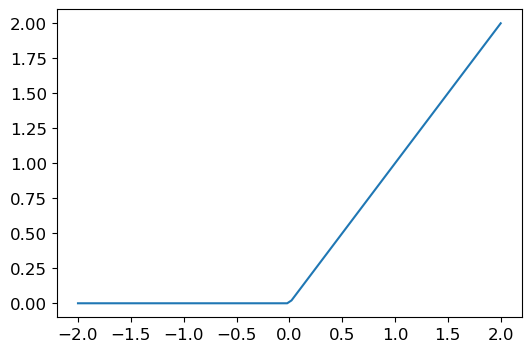

In [142]:
plot_function(F.relu)


In [143]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [144]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [145]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.357809,0.395824,0.511286,00:00
1,0.163861,0.247912,0.781158,00:00
2,0.088579,0.120991,0.911187,00:00
3,0.056597,0.079901,0.939647,00:00
4,0.041966,0.061844,0.956330,00:00
5,0.034643,0.051889,0.962218,00:00
6,0.030529,0.045669,0.965162,00:00
7,0.027908,0.041440,0.967125,00:00
8,0.026046,0.038380,0.968106,00:00
9,0.024618,0.036053,0.969578,00:00


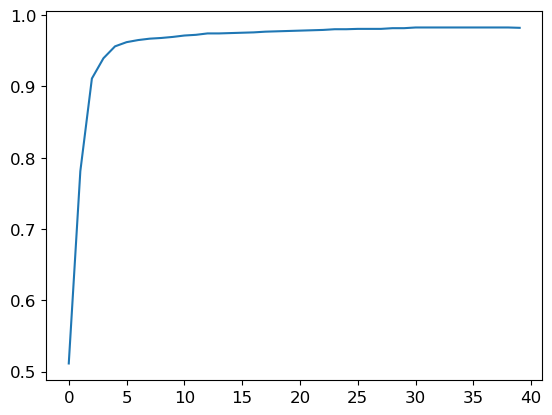

In [146]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [147]:
learn.recorder.values[-1][2]

0.98233562707901

In [148]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

C:\Users\Kesha\conda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kesha\conda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.100452,0.008658,0.998528,04:59
